## OBJECTIVE : 

### Performing EDA over processed (both simple and complex) training data 

In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import os
import sys
import ipdb
import numpy as np
import pandas as pd
import spacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import sent_tokenize, word_tokenize

print("Numpy Version : ", np.__version__)
print("Pandas Version : ", pd.__version__)

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

print("Matplotlib Version : ", mpl.__version__)

Numpy Version :  1.18.1
Pandas Version :  1.0.1
Matplotlib Version :  3.1.3


In [3]:
# Initializing spacy model
nlp = spacy.load('en_core_web_md')

In [4]:
DATA_DIR = "../data/"
OBJECT_DIR = "../objects/"
LOG_DIR = "../logs/"

In [5]:
LUCKY_SEED = 42

In [6]:
PROCESSED_DATA_DIR = os.path.join(DATA_DIR, "processed_data")

In [24]:
SIMPLE_PROC_DATA_DIR = os.path.join(PROCESSED_DATA_DIR, "simple")
COMPLEX_PROC_DATA_DIR = os.path.join(PROCESSED_DATA_DIR, "complex")

In [25]:
simple_data = pd.read_csv(os.path.join(SIMPLE_PROC_DATA_DIR, "train_data_simple.csv"))
complex_data = pd.read_csv(os.path.join(COMPLEX_PROC_DATA_DIR, "train_data_complex.csv"))

In [26]:
print("Shape of simple data : ", simple_data.shape)
print()
print("Shape of complex data : ", complex_data.shape)
print()
print("Simple data info : ")
print(simple_data.info())
print()
print("Complex data info : ")
print(complex_data.info())

Shape of simple data :  (28601, 2)

Shape of complex data :  (28424, 2)

Simple data info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28601 entries, 0 to 28600
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       28601 non-null  object
 1   sentiment  28601 non-null  object
dtypes: object(2)
memory usage: 447.0+ KB
None

Complex data info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28424 entries, 0 to 28423
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       28424 non-null  object
 1   sentiment  28424 non-null  object
dtypes: object(2)
memory usage: 444.2+ KB
None


In [30]:
complex_data["sentiment"].value_counts() / complex_data.shape[0]

worry         0.207677
neutral       0.173832
sadness       0.169118
happiness     0.122221
love          0.057803
fear          0.052737
surprise      0.044751
anger         0.042499
hate          0.033422
fun           0.030538
relief        0.028567
empty         0.017837
enthusiasm    0.014565
boredom       0.004433
Name: sentiment, dtype: float64

Different types of emotions and their counts : 


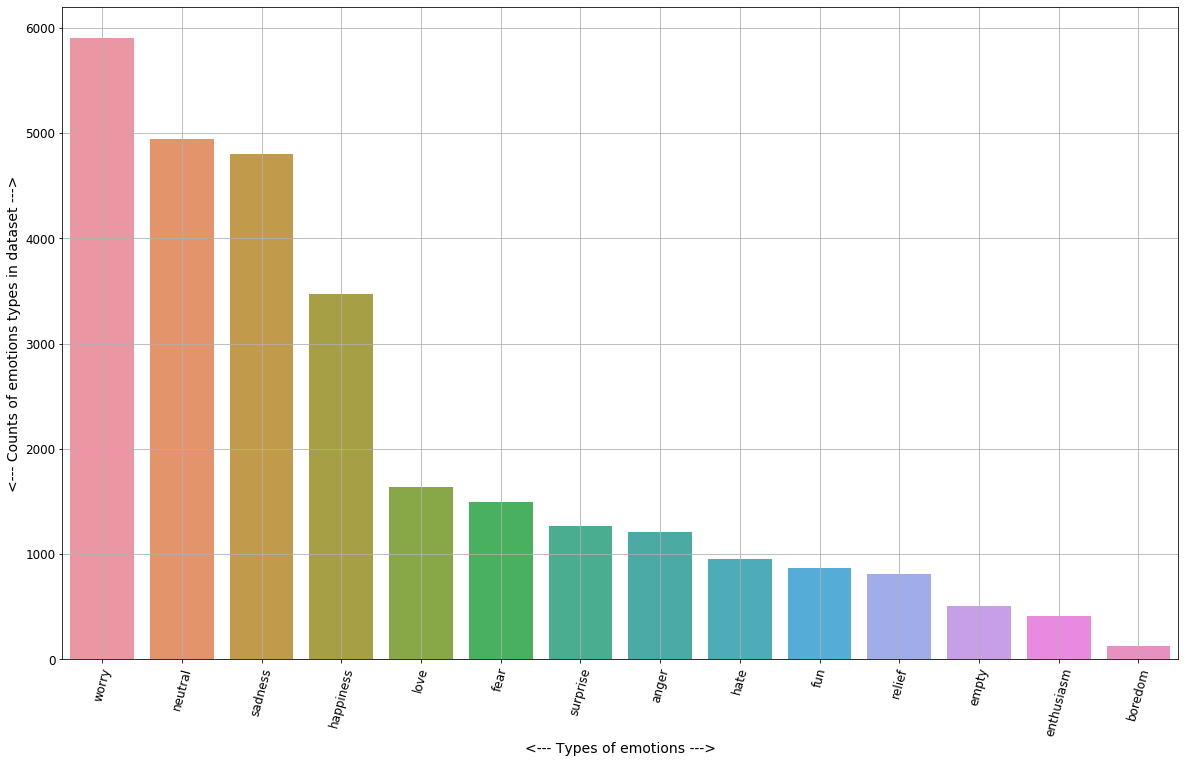

In [33]:
print('Different types of emotions and their counts : ')
fig_dims = (20, 12)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(complex_data['sentiment'].value_counts().index, complex_data['sentiment'].value_counts().values)
plt.xticks(rotation=75)
plt.grid()
plt.xlabel('<--- Types of emotions --->')
plt.ylabel('<--- Counts of emotions types in dataset --->')
plt.show()

In [34]:
complex_data["lcased_text"] = complex_data["text"].map(lambda x:x.lower())

In [35]:
def create_wordcloud(sentences, label):
    print("Target Type : ", label)
    fig_dims = (20, 12)
    text = ' '.join(sentences) 
    wordcloud = WordCloud(stopwords=STOPWORDS, max_words=200, background_color="white").generate(text)
    fig, ax = plt.subplots(figsize=fig_dims)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
def get_word_count(text):
    word_count = 0
    sentences = sent_tokenize(text)
    for sen in sentences:
        word_count += len(word_tokenize(sen))
    return word_count

Target Type :  worry tweets


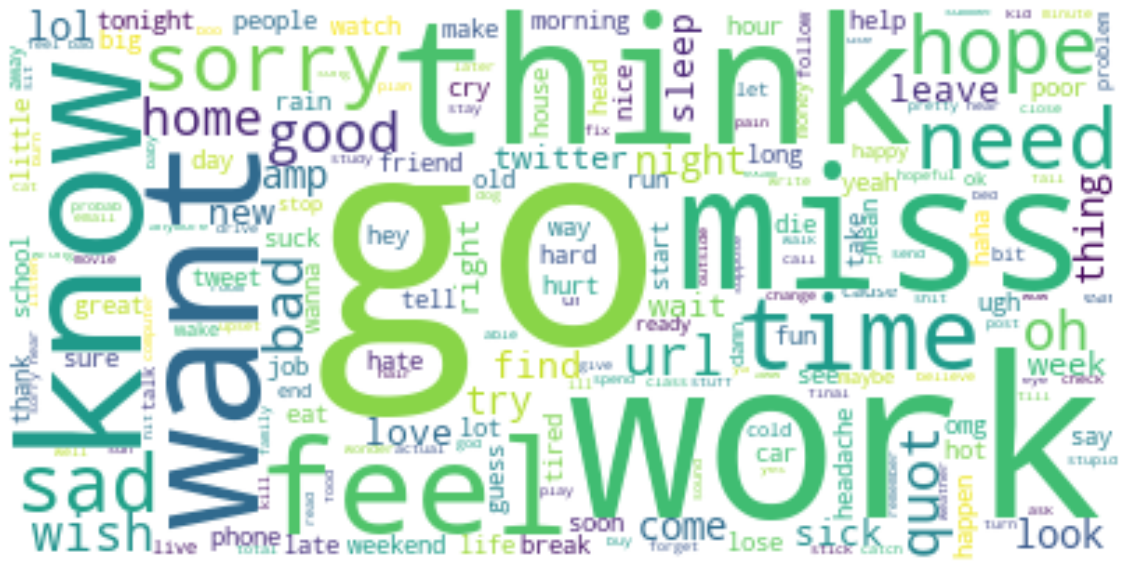


--------------------------------------------------------------------------------------------------------

Target Type :  neutral tweets


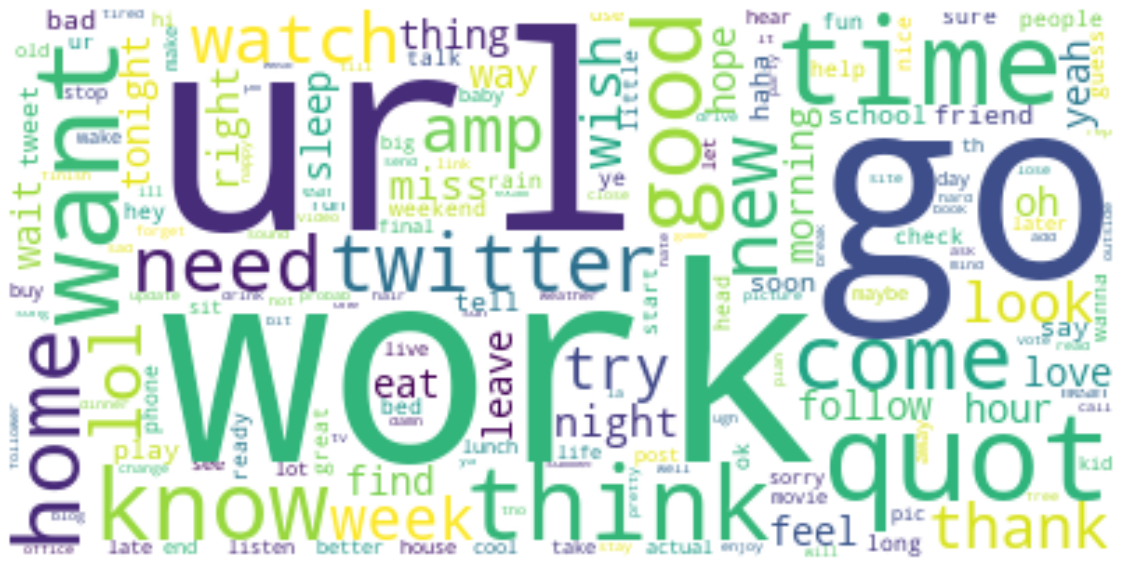


--------------------------------------------------------------------------------------------------------

Target Type :  sadness tweets


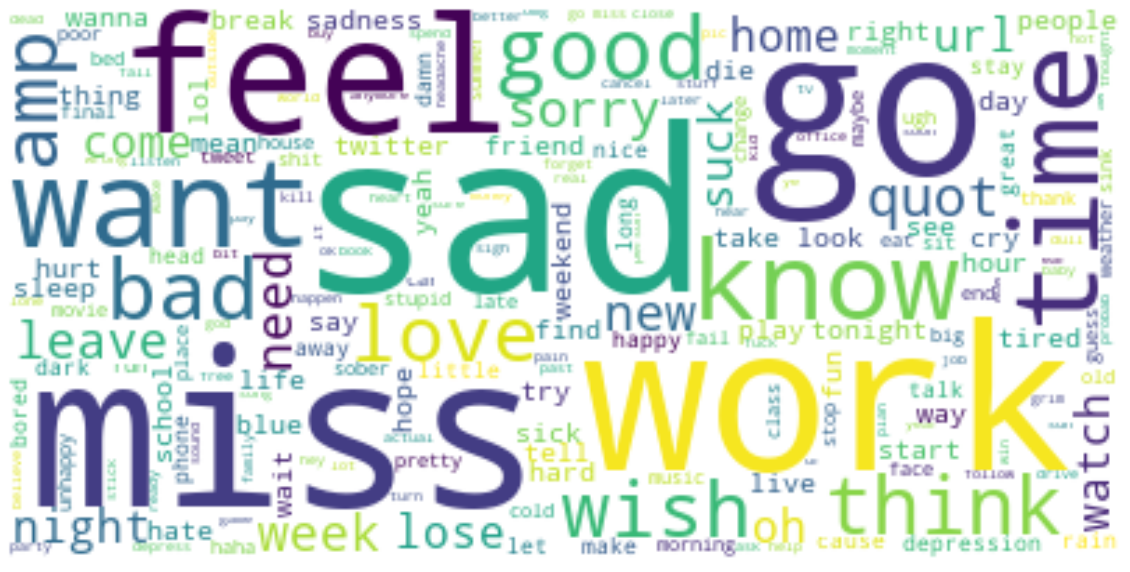


--------------------------------------------------------------------------------------------------------

Target Type :  happiness tweets


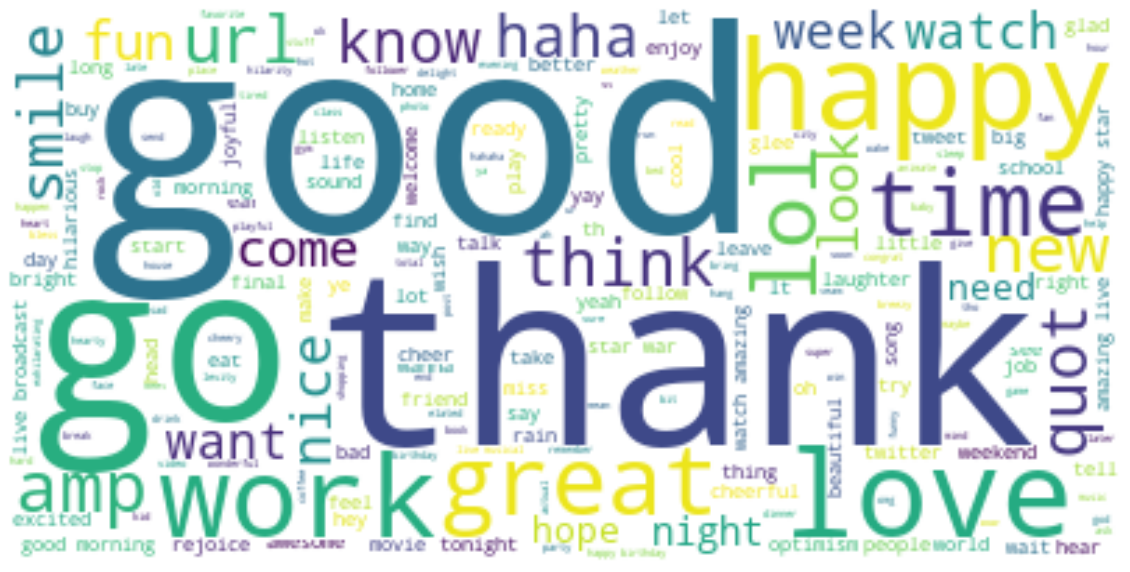


--------------------------------------------------------------------------------------------------------

Target Type :  love tweets


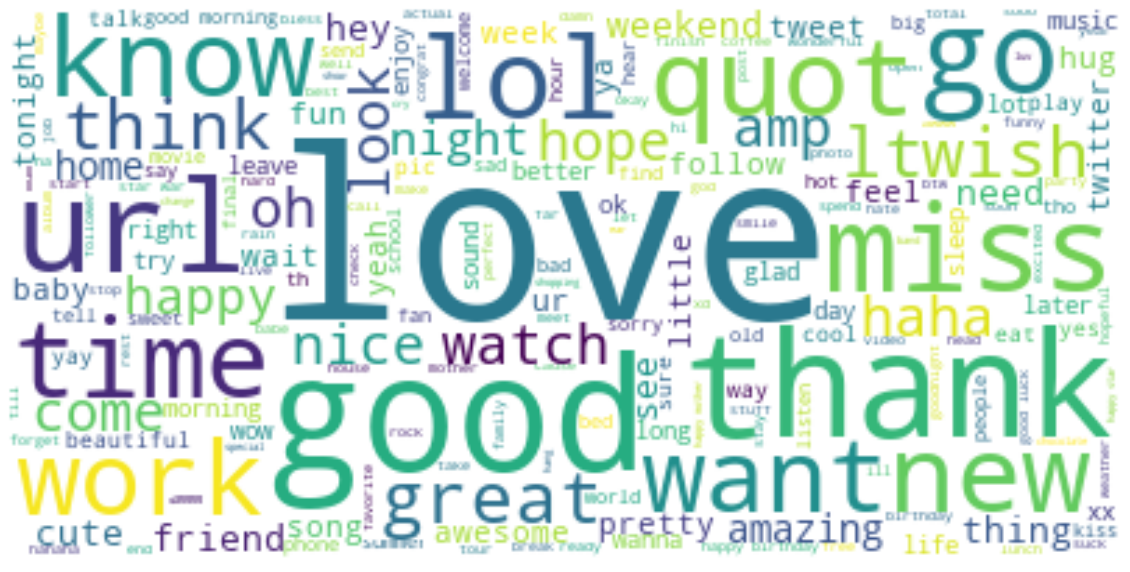


--------------------------------------------------------------------------------------------------------

Target Type :  fear tweets


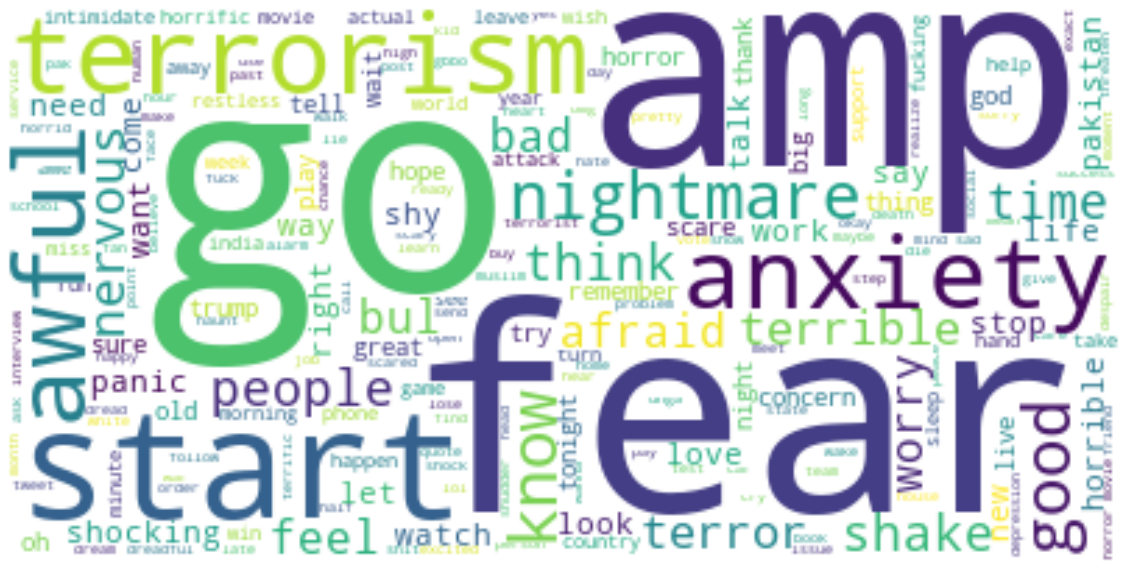


--------------------------------------------------------------------------------------------------------

Target Type :  surprise tweets


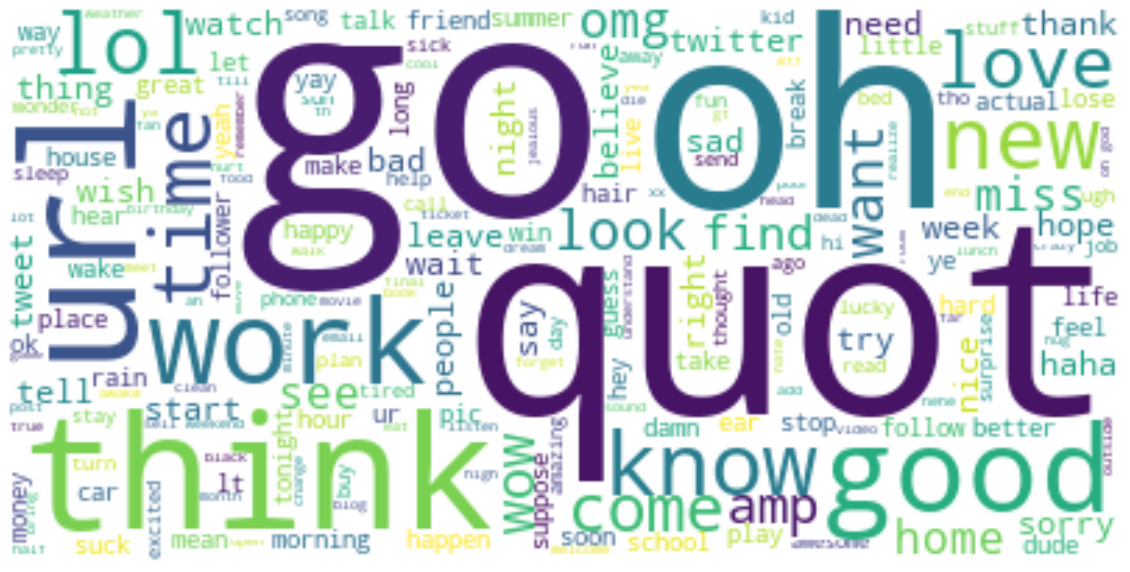


--------------------------------------------------------------------------------------------------------

Target Type :  anger tweets


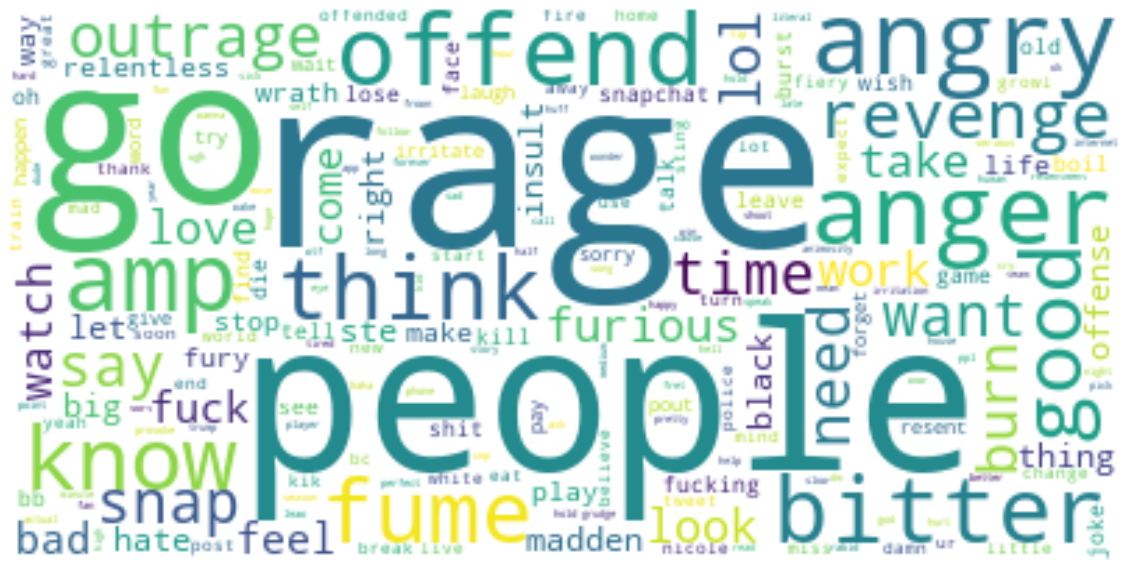


--------------------------------------------------------------------------------------------------------

Target Type :  hate tweets


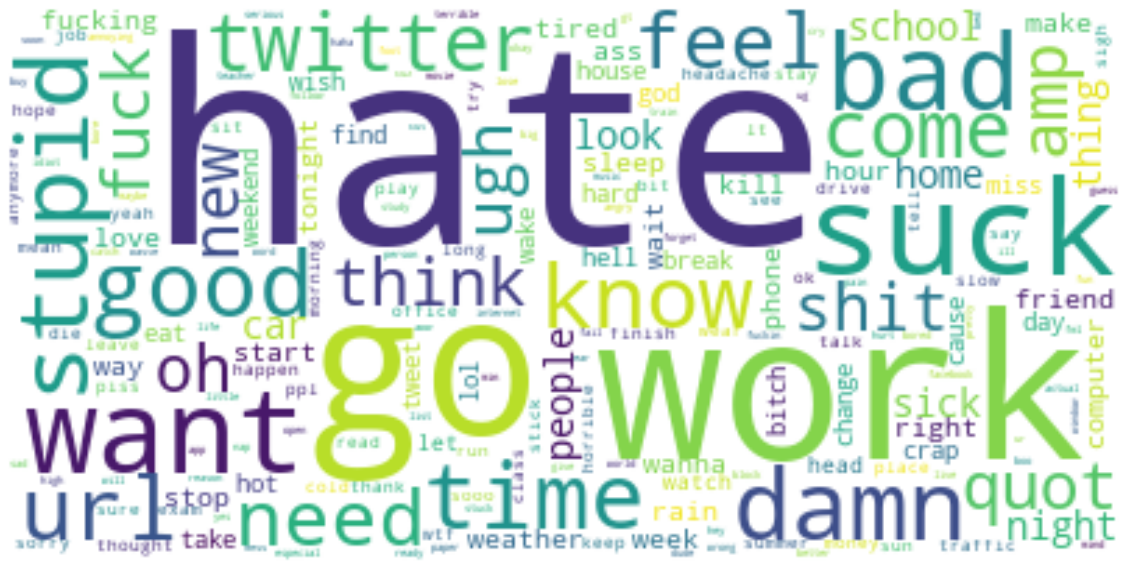


--------------------------------------------------------------------------------------------------------

Target Type :  fun tweets


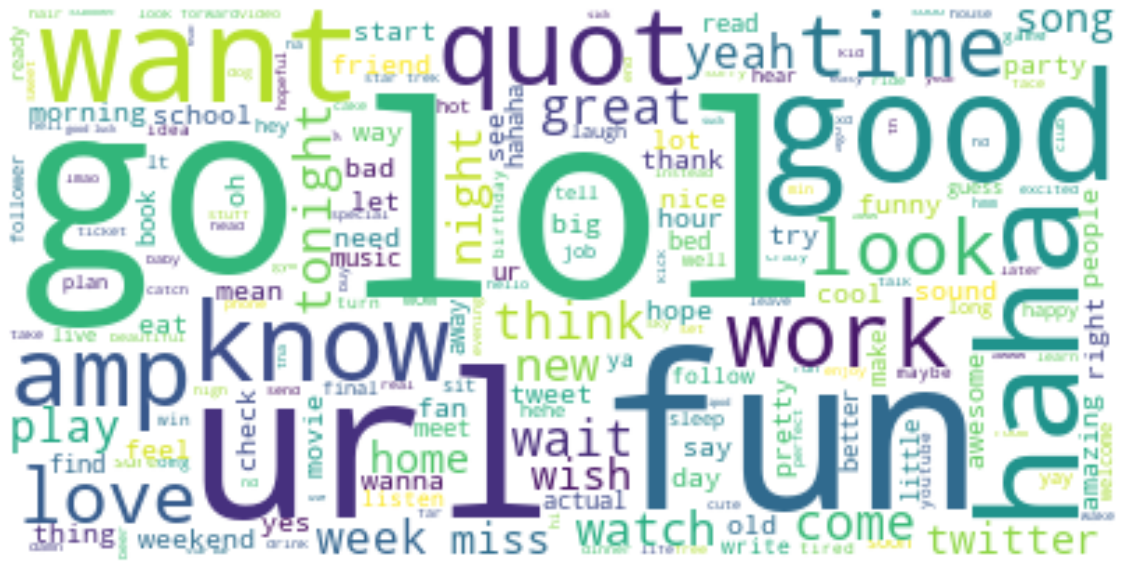


--------------------------------------------------------------------------------------------------------

Target Type :  relief tweets


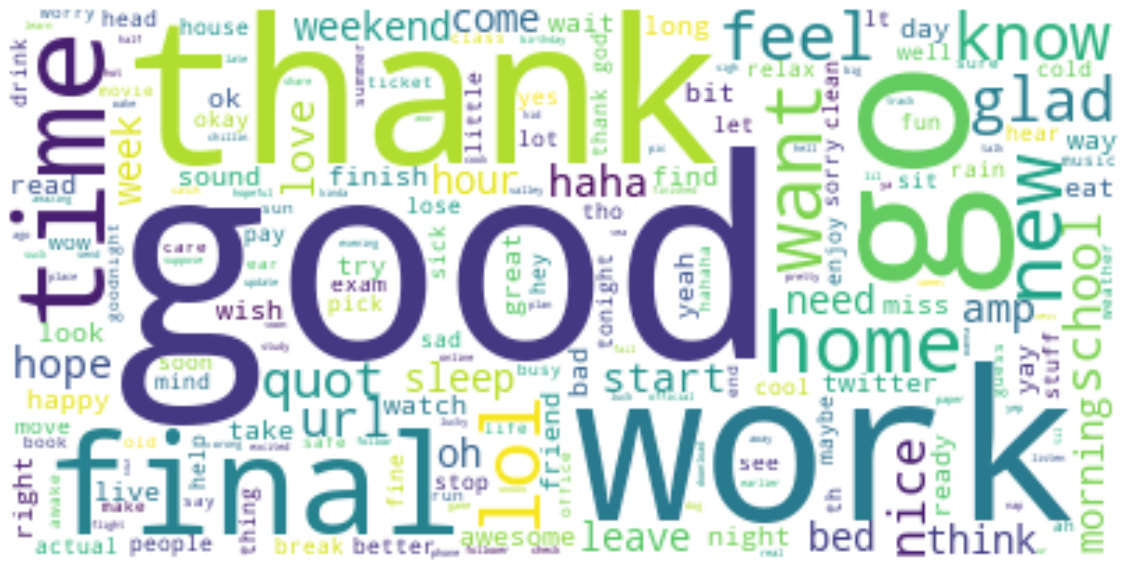


--------------------------------------------------------------------------------------------------------

Target Type :  empty tweets


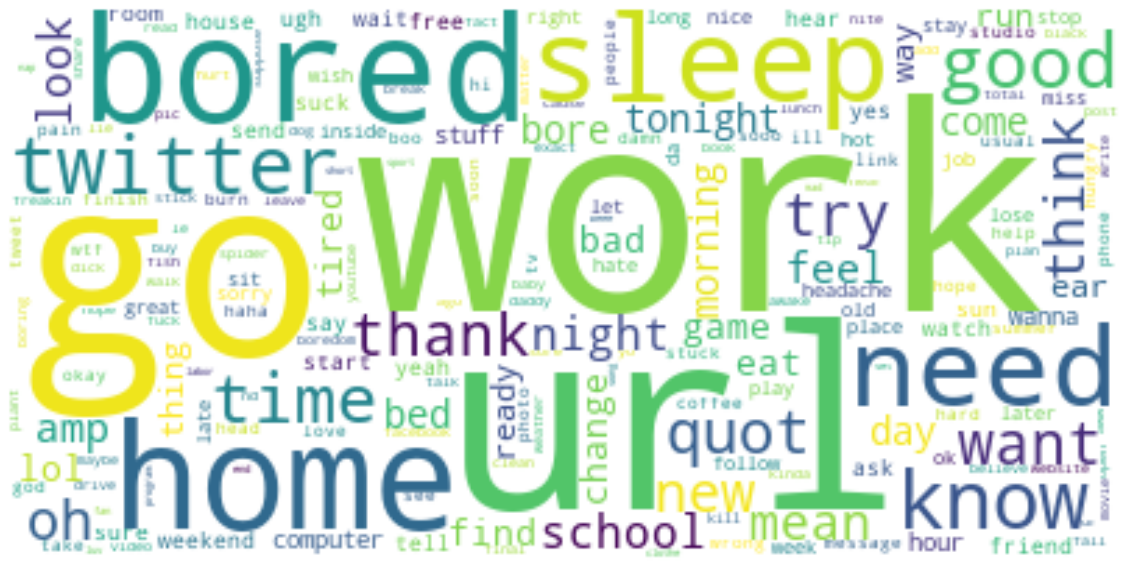


--------------------------------------------------------------------------------------------------------

Target Type :  enthusiasm tweets


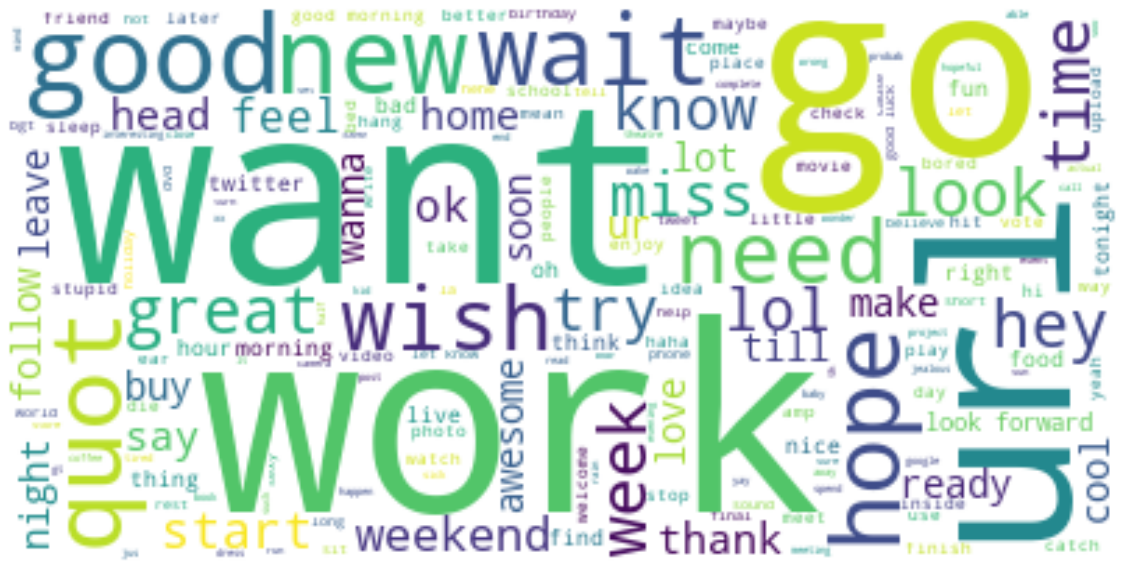


--------------------------------------------------------------------------------------------------------

Target Type :  boredom tweets


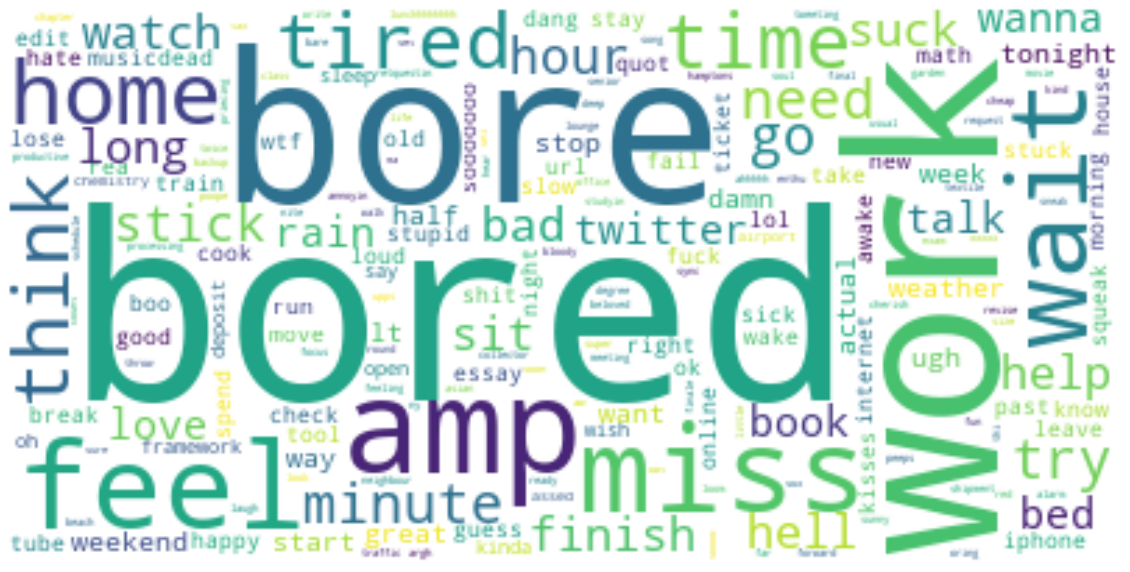


--------------------------------------------------------------------------------------------------------



In [43]:
for i in complex_data['sentiment'].value_counts().index:
    create_wordcloud(complex_data.loc[complex_data["sentiment"]==i, "lcased_text"].values, i + " tweets")
    print()
    print("-" * 104)
    print()